# COVID-19 Data analysis for France, Johns Hopkins Univerity (JHU) data source

Data extract from github https://github.com/CSSEGISandData/COVID-19.git provided by JHU(johns-hopkins-university) CSSE USA.

Datasets are directly extracted from online repository (CSSE github) to then display charts for the dataset and extra figure from analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime

# import local functions
import covid19_analysis.dataFun as df
import covid19_analysis.dataPlot as dplot

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Define path from online repo
repo_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/'
cases_path = 'master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
recov_path = 'master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
death_path = 'master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'

# Get data from online repo
df_c=pd.read_csv(repo_url+cases_path)
df_d=pd.read_csv(repo_url+death_path)
df_r=pd.read_csv(repo_url+recov_path)

## Load data for France

From dataset get french magnitudes over time, they might be only mainland or the sum of mailand + its islands

In [31]:
# Extract all info for mainland France (exclude all other islands)
c_study = 'France'

# Get a timeseries with country data (last argument "mainland" is True by default)
ctry_cases = df.get_timeseries_from_JHU(df_c, c_study)
ctry_death = df.get_timeseries_from_JHU(df_d, c_study)
ctry_recov = df.get_timeseries_from_JHU(df_r, c_study)

data_jhu = pd.DataFrame(index=ctry_cases.index)
data_jhu['cases'] = ctry_cases.values
data_jhu['death'] = ctry_death.values
data_jhu['recov'] = ctry_recov.values

In [9]:
# For Europe, interesting data start from Feb 23, 2020
start_date = '2020-2-23'
mask = ctry_cases.index > start_date

Report the current situation in France

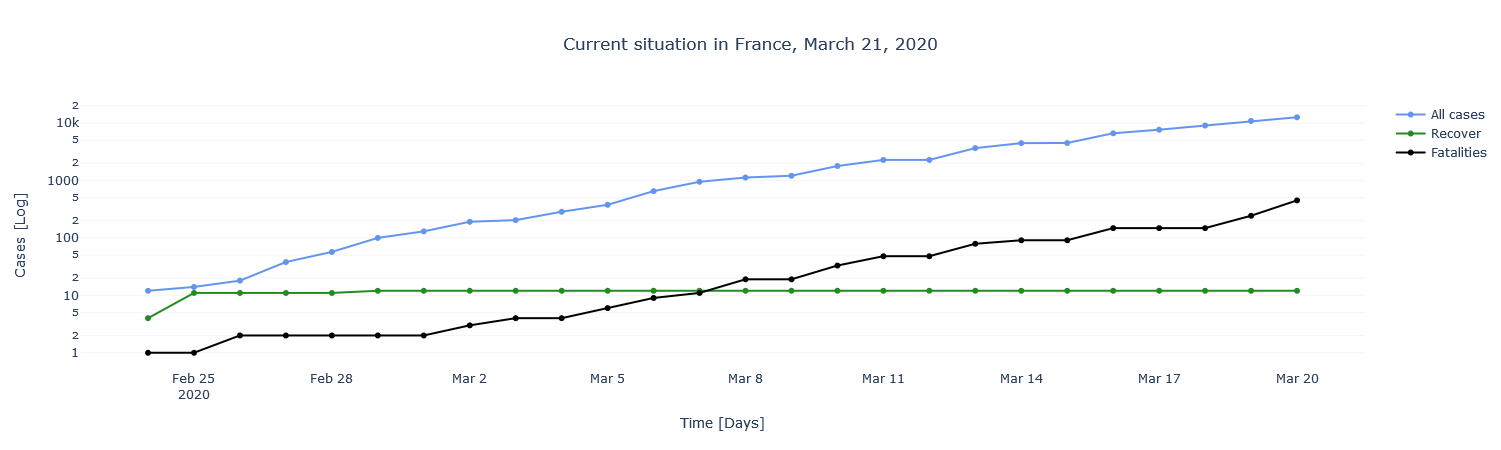

In [11]:
dplot.disp_cum_jhu(ctry_cases, ctry_recov, ctry_death, c_study, mask)

The currenty tendency (March 2020) for the french data consist in a constant exponential growing over time. Data on regard to recoveries has stopped and fatalies are still growing as well.

## Check recoveries and fatalities rates & daily evolution

For daily evolution in France the recoveries data is not up to day (goverment politics) and fatality rate tends to decrease over time

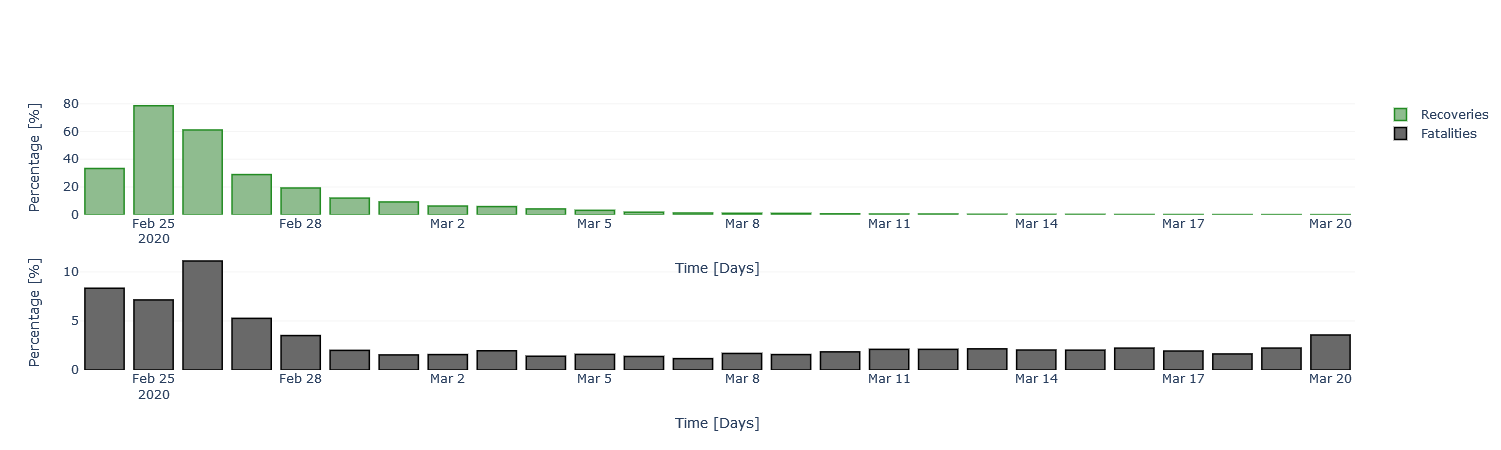

In [19]:
dplot.disp_country_rates_jhu(ctry_cases, ctry_recov, ctry_death, c_study, mask)

*Data is shown from 23 Feb 2020, since previous data does not display the disease evolution in the country.

Total death cases has reach a tendency value around ~2 % over the past two weeks (March 8, 2020). It correspond to a low death ratio compare to the spread in China. However, the statistics on deaths from corona are calculated on the current population infected, a better number can be calculated on regard to the number of close cases and not only open cases (current infected population)

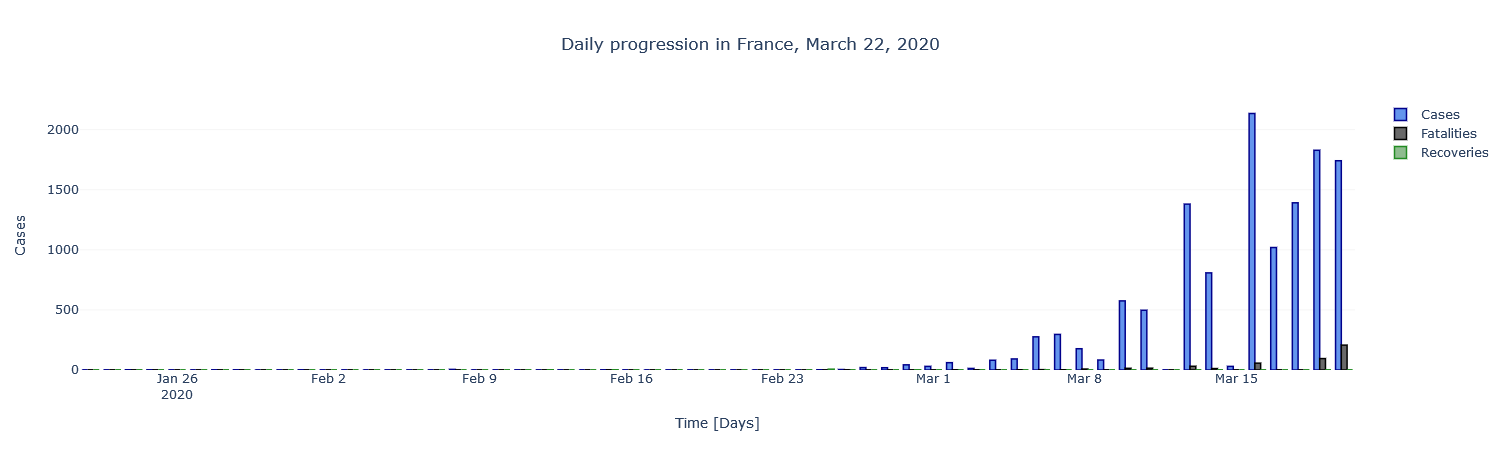

In [40]:
dplot.disp_daily_cases(data_jhu, c_study)

The daily variation of cases, recoveries and fatalies are different to the data provide by the Sante Publique France. Cumulated data seems to be okay but daily are not. The realiability of the JHU source for recoveries and fatalies is not the best

### (INCOMPLETE) Calculate the real cases using fatality cases & extra asumptions

In [12]:
# asumptions
Ro = 2.5 # ratio of infection, 
days2death = 20
fatality_ratio = .01

In [13]:
time_v = np.array(range(0,50))
NCo = 10
nc_v = np.array(time_v.size)

t0 = 0
nc_v = np.floor(1 + np.clip((time_v-t0)/Ro, 0, None))
nc_v

array([ 1.,  1.,  1.,  2.,  2.,  3.,  3.,  3.,  4.,  4.,  5.,  5.,  5.,
        6.,  6.,  7.,  7.,  7.,  8.,  8.,  9.,  9.,  9., 10., 10., 11.,
       11., 11., 12., 12., 13., 13., 13., 14., 14., 15., 15., 15., 16.,
       16., 17., 17., 17., 18., 18., 19., 19., 19., 20., 20.])